In [79]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime


In [55]:
tickers = ['TSLA', 'AAPL', 'NUGT', 'AMD']
start = datetime.datetime(2015,3,23)
end = datetime.datetime(2017,3,23)
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = yf.download(t, start=start, end=end)['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [58]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2015-03-23 to 2017-03-22
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TSLA    505 non-null    float64
 1   AAPL    505 non-null    float64
 2   NUGT    505 non-null    float64
 3   AMD     505 non-null    float64
dtypes: float64(4)
memory usage: 19.7 KB


In [59]:
mydata.head()

,TSLA,AAPL,NUGT,AMD
Date,,,,
2015-03-23,13.308667,28.504995,459.086334,2.84
2015-03-24,13.448000,28.388483,452.577209,2.79
2015-03-25,12.953333,27.646778,433.815582,2.63
2015-03-26,12.694000,27.839479,412.756592,2.65
2015-03-27,12.333333,27.617641,397.440887,2.72


In [60]:
mydata.tail()

,TSLA,AAPL,NUGT,AMD
Date,,,,
2017-03-16,17.469999,32.788776,173.066742,13.65
2017-03-17,17.433332,32.625637,170.769424,13.49
2017-03-20,17.461332,32.968235,176.512756,14.40
2017-03-21,16.712000,32.590683,183.979141,13.82
2017-03-22,17.000668,32.958920,184.362030,14.10


Normalización a 100:$$\frac{P_i}{P_0}*100$$

In [61]:
mydata.iloc[0]

TSLA     13.308667
AAPL     28.504995
NUGT    459.086334
AMD       2.840000
Name: 2015-03-23 00:00:00, dtype: float64

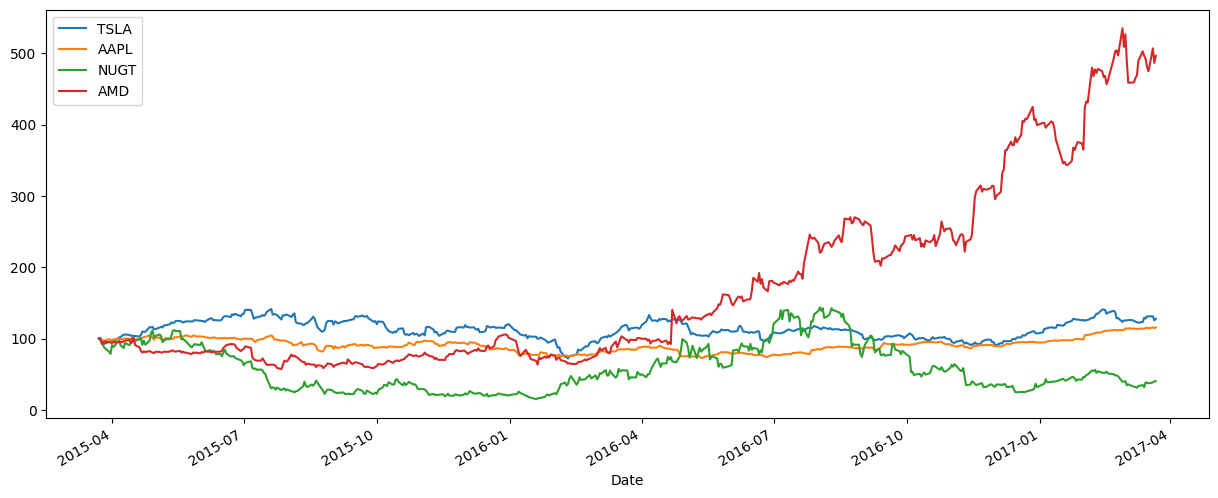

In [62]:
(mydata / mydata.iloc[0]*100).plot(figsize=(15,6))
plt.show()

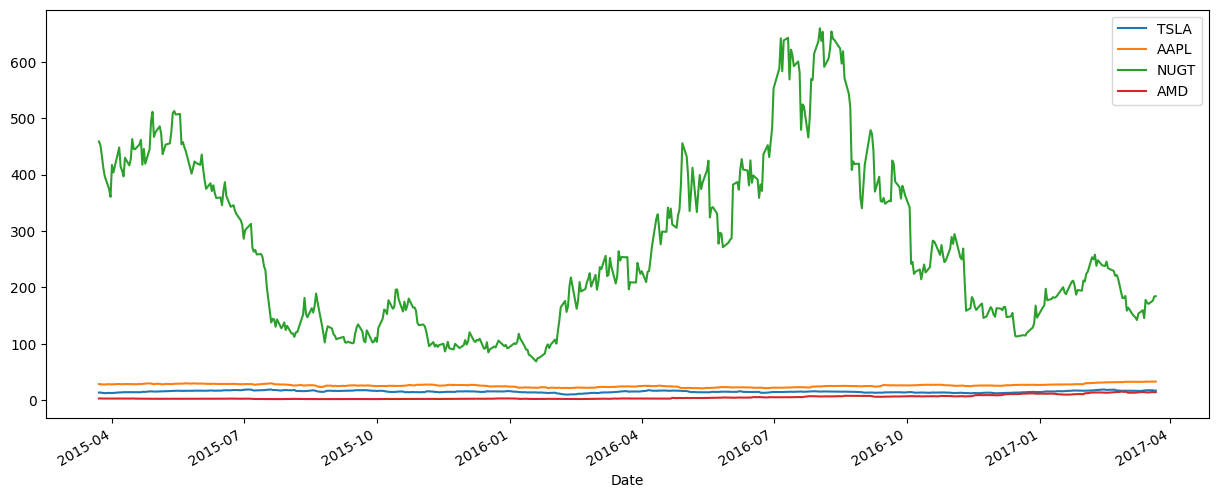

In [63]:
mydata.plot(figsize=(15,6))
plt.show()

In [64]:
mydata.loc['2015-3-23']

TSLA     13.308667
AAPL     28.504995
NUGT    459.086334
AMD       2.840000
Name: 2015-03-23 00:00:00, dtype: float64

In [65]:
mydata.iloc[0]

TSLA     13.308667
AAPL     28.504995
NUGT    459.086334
AMD       2.840000
Name: 2015-03-23 00:00:00, dtype: float64

### Calculo de los retornos de un portafolio

In [66]:
returns = (mydata / mydata.shift(1))-1
returns.head()

,TSLA,AAPL,NUGT,AMD
Date,,,,
2015-03-23,NaN,NaN,NaN,NaN
2015-03-24,0.010469,-0.004087,-0.014178,-0.017606
2015-03-25,-0.036784,-0.026127,-0.041455,-0.057348
2015-03-26,-0.020021,0.006970,-0.048544,0.007605
2015-03-27,-0.028412,-0.007968,-0.037106,0.026415


In [67]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [68]:
weights

array([0.25, 0.25, 0.25, 0.25])

In [69]:
np.dot(returns,weights)

array([            nan, -6.35053977e-03, -4.04283395e-02, -1.34973769e-02,
       -1.17679289e-02, -2.19260250e-03, -1.74995378e-02,  3.82865876e-02,
       -1.33007879e-03,  4.83048632e-02, -2.14467519e-02,  1.15911306e-03,
       -3.68187856e-04,  2.64399651e-02, -7.79951941e-03, -7.07718360e-03,
        2.50196868e-02,  3.67441807e-03, -2.81809441e-02, -1.17899833e-04,
       -5.93555891e-03, -1.59433315e-02,  2.32941016e-02, -1.68420140e-02,
        3.91947955e-02,  1.94307393e-02,  3.72754577e-03, -3.75652852e-02,
        1.74030033e-02,  1.01110164e-02, -1.31289541e-02, -2.22215991e-02,
        1.63376885e-02,  8.38460610e-03,  2.84548351e-03,  1.87469950e-02,
        1.85254845e-02,  4.43901035e-03,  4.47518692e-04,  6.27690596e-03,
       -3.56904910e-02,  3.65228102e-03, -5.47114654e-03,  4.96236328e-04,
       -3.48895475e-02,  1.75843152e-02,  9.44338727e-03, -3.74685477e-03,
       -6.40898089e-03,  1.43515526e-02, -1.61603873e-02, -1.07423860e-02,
       -8.14781141e-03,  

In [70]:
annual_returns= returns.mean()*250
annual_returns

TSLA    0.195163
AAPL    0.100478
NUGT    0.503194
AMD     1.037816
dtype: float64

In [71]:
np.dot(annual_returns, weights)

0.45916263997020706

In [72]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5)* 100) + '%'
print(pfolio_1)

45.916000000000004%


In [73]:
weights_2= np.array([0.4, 0.4, 0.15, 0.05])

In [53]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5)* 100) + '%'
print(pfolio_1)
print(pfolio_2)

-3.8629999999999995%
14.607000000000001%


In [76]:
weights_3= np.array([0.30, 0.30, 0.30, 0.10])

In [77]:
pfolio_3 = str(round(np.dot(annual_returns, weights_2), 5)* 100) + '%'
print(pfolio_1)
print(pfolio_2)
print(pfolio_3)

45.916000000000004%
14.607000000000001%
24.563%


In [89]:
import pandas as pd
import numpy as np
import yfinance as yf
from scipy.optimize import minimize

# Descargar datos de Yahoo Finance
tickers = ['TSLA', 'AAPL', 'NUGT', 'AMD']
data = yf.download(tickers, start='2020-01-01', end='2021-01-01')['Adj Close']

# Calcular retornos diarios
returns = data.pct_change().dropna()

# Calcular estadísticas de los retornos
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Función para calcular el rendimiento del portafolio
def portfolio_return(weights, mean_returns):
    return np.sum(mean_returns * weights)

# Función para calcular la volatilidad del portafolio
def portfolio_volatility(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Función objetivo para maximizar el ratio de Sharpe
def sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0):
    p_return = portfolio_return(weights, mean_returns)
    p_volatility = portfolio_volatility(weights, cov_matrix)
    return -(p_return - risk_free_rate) / p_volatility

# Restricciones y límites para la optimización
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
bounds = tuple((0, 1) for _ in range(len(tickers)))

# Pesos iniciales
initial_weights = np.array([0.25, 0.25, 0.25, 0.25])

# Optimización
optimized = minimize(sharpe_ratio, initial_weights, args=(mean_returns, cov_matrix),
                     method='SLSQP', bounds=bounds, constraints=constraints)

# Pesos óptimos
optimal_weights = optimized.x

# Convertir los pesos a porcentajes
optimal_weights_percentages = optimal_weights * 100

# Resultados
print("Pesos óptimos (en porcentajes):")
for ticker, weight in zip(tickers, optimal_weights_percentages):
    print(f"{ticker}: {weight:.2f}%")

# Mostrar el rendimiento esperado y el riesgo del portafolio
print("\nRendimiento esperado del portafolio:", portfolio_return(optimal_weights, mean_returns))
print("Volatilidad del portafolio:", portfolio_volatility(optimal_weights, cov_matrix))

# Calcular el ratio de Sharpe óptimo
optimal_sharpe_ratio = -sharpe_ratio(optimal_weights, mean_returns, cov_matrix)
print("Ratio de Sharpe óptimo:", optimal_sharpe_ratio)



[*********************100%%**********************]  4 of 4 completed


Pesos óptimos (en porcentajes):
TSLA: 10.44%
AAPL: 1.24%
NUGT: 0.00%
AMD: 88.33%

Rendimiento esperado del portafolio: 0.009133652813741407
Volatilidad del portafolio: 0.05152013145964079
Ratio de Sharpe óptimo: 0.17728318144716723
